In [100]:
import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import preprocessing
from sklearn import metrics
from matplotlib import pyplot as plt

In [61]:
import random

In [86]:
data = []
for x in range(200):
    data.append({'x': x + random.randint(0, 100), 'y': x + random.randint(0, 100)})
df = pd.DataFrame(data)
scaler = preprocessing.MinMaxScaler()
scaler.fit(df[['x']])
df.x = scaler.transform(df[['x']])
scaler.fit(df[['y']])
df.y = scaler.transform(df[['y']])

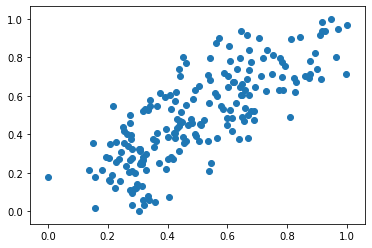

In [87]:
plt.scatter(df.x, df.y)

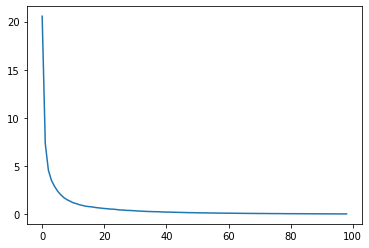

In [89]:
test = []
for t in range(1, 100):
    km = cluster.KMeans(n_clusters=t)
    km.fit(df[['x', 'y']])
    test.append(km.inertia_)
plt.plot(test)

[[0.30761844 0.31703398]
 [0.83157277 0.71254209]
 [0.61737089 0.83939394]
 [0.46612433 0.40386625]
 [0.64084507 0.49122807]
 [0.29973592 0.07670455]
 [0.38591549 0.57784091]
 [0.91773367 0.91976584]
 [0.20360398 0.2201426 ]
 [0.62548015 0.66150138]]


KeyError: "None of [Int64Index([ 0,  3, 22, 25, 27, 28, 29, 31, 33, 34, 35, 36, 42, 44, 47, 48, 51,\n            55, 57, 59, 62, 63, 67, 72, 73, 74, 75, 78, 79, 80, 83, 88, 93],\n           dtype='int64')] are in the [columns]"

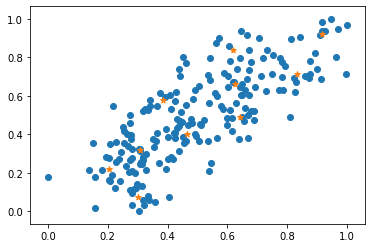

In [115]:
km = cluster.KMeans(n_clusters=10)
km.fit(df[['x', 'y']])
centroids = km.cluster_centers_
print(centroids)
plt.scatter(df.x, df.y)
plt.scatter(centroids[:,0], centroids[:,1], marker='*')
for ind, i in enumerate(centroids):
    class_inds=np.where(km.labels_==ind)[0]
    metrics.pairwise_distances(i, df[class_inds])
#         #print(max_dist)
#         plt.gca().add_artist(plt.Circle(i, 100, fill=True))
plt.show()

In [116]:
df['cluster'] = km.labels_

In [117]:
df

,x,y,cluster
0,0.313380,0.246212,0
1,0.137324,0.215909,8
2,0.000000,0.178030,8
3,0.313380,0.257576,0
4,0.239437,0.155303,8
...,...,...,...
195,1.000000,0.965909,7
196,0.753521,0.810606,1
197,0.996479,0.712121,1
198,0.947183,1.000000,7
